[Reference](https://medium.com/mlearning-ai/kats-time-series-forecasting-by-facebook-a2741794d814)

In [1]:
!pip install kats

     |████████████████████████████████| 6.3 MB 6.8 MB/s 
     |████████████████████████████████| 866 kB 55.0 MB/s 
     |████████████████████████████████| 64 kB 2.4 MB/s 
     |████████████████████████████████| 503 kB 55.7 MB/s 
     |████████████████████████████████| 3.3 MB 44.0 MB/s 
     |████████████████████████████████| 23.9 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 28.6 MB/s 
     |████████████████████████████████| 26.3 MB 93 kB/s 
     |████████████████████████████████| 486 kB 58.5 MB/s 
  Created wheel for kats: filename=kats-0.1.0-py3-none-any.whl size=286607 sha256=fe86182b289e429bd80b2d3f9428417290b63863fb9b5975e98d9c32399a137c
  Stored in directory: /root/.cache/pip/wheels/c8/dd/5b/cc7cb7fc37c5b838c65e504437bba4c1828a3fbb473c0c11be
  Created wheel for fbprophet: filename=fbprophet-0.7-py3-none-any.whl size=6637890 sha256=65cfaa53886f413ce494937628b8f28cb81702598dc764c1f8e188f3bc8de2c3
  Stored in directory: /root/.cache/pip/wheels/82/e8/a8/53f37f0a409bc51f

# Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import warnings

from kats.consts import TimeSeriesData

# Loading Dataset

In [16]:
# take 'apple stock' data as an example
apple_df = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/AAPL.csv')
apple_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-01,56.267502,57.055000,56.049999,56.147499,55.595886,139223200
1,2019-10-02,55.764999,55.895000,54.482498,54.740002,54.202213,138449200
2,2019-10-03,54.607498,55.240002,53.782501,55.205002,54.662643,114426000
3,2019-10-04,56.410000,56.872501,55.972500,56.752499,56.194942,138478800
4,2019-10-07,56.567501,57.482498,56.459999,56.764999,56.207317,122306000
...,...,...,...,...,...,...,...
248,2020-09-24,105.169998,110.250000,105.000000,108.220001,108.220001,167743300
249,2020-09-25,108.430000,112.440002,107.669998,112.279999,112.279999,149981400
250,2020-09-28,115.010002,115.320000,112.779999,114.959999,114.959999,137672400
251,2020-09-29,114.550003,115.309998,113.570000,114.089996,114.089996,99382200


In [17]:
apple_df = apple_df[['Date','Close']]

# Forecasting
Using Prophet model to forecast the air_passengers data set.

In [18]:
apple_df.columns = ["time", "value"]
# convert to TimeSeriesData object
apple_ts = TimeSeriesData(apple_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


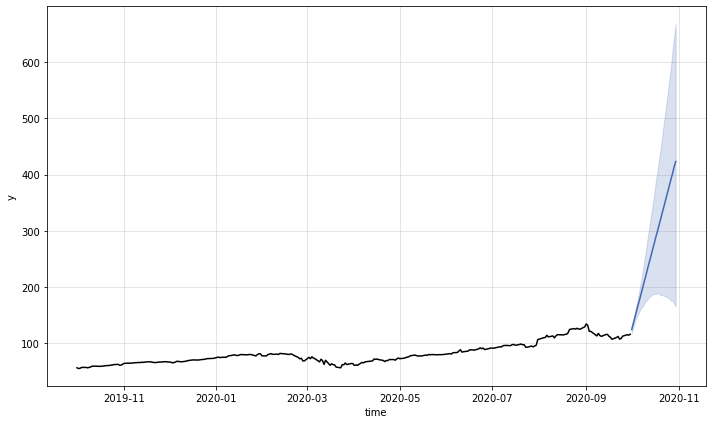

In [27]:
from kats.models.prophet import ProphetModel, ProphetParams
warnings.simplefilter(action='ignore')

# create a model param instance
params = ProphetParams(seasonality_mode='additive') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(apple_ts, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30, freq="MS")

# make plot to visualize
m.plot()

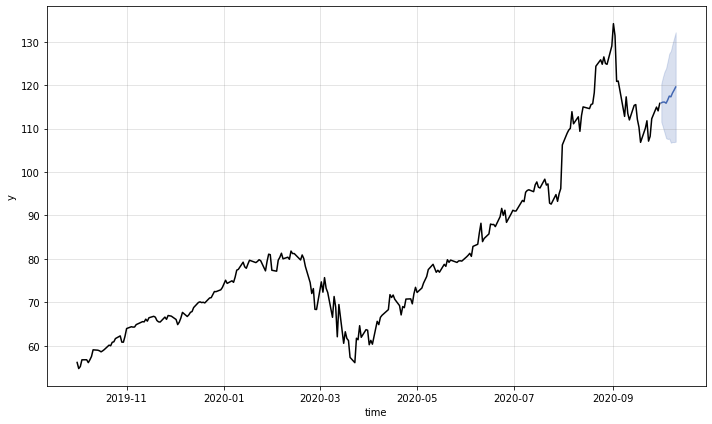

In [25]:
from kats.models.sarima import SARIMAModel, SARIMAParams
warnings.simplefilter(action='ignore')

# create SARIMA param class
params = SARIMAParams(
    p = 2, 
    d = 1, 
    q = 1, 
    trend = 'ct', 
    seasonal_order=(1, 0, 1, 12)
    )

# initiate SARIMA model
m = SARIMAModel(data=apple_ts, params=params)

# fit SARIMA model
m.fit()

# generate forecast values
fcst = m.predict(
    steps = 10
    #freq="MS"
    )

# make plot to visualize
m.plot()

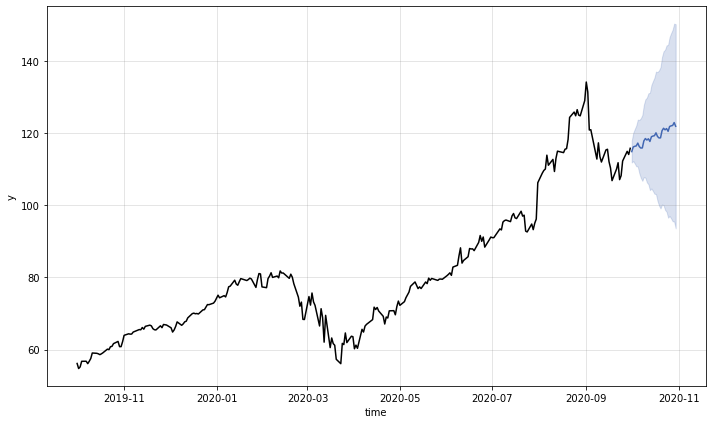

In [26]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
warnings.simplefilter(action='ignore')

params = HoltWintersParams(
            trend="add",
            #damped=False,
            seasonal="mul",
            seasonal_periods=12,
        )
m = HoltWintersModel(
    data = apple_ts, 
    params=params)

m.fit()
fcst = m.predict(steps=30, alpha = 0.1)
m.plot()

# Detection
Using CUSUM detection algorithm on simulated data set.

In [28]:
# import packages
import numpy as np
import pandas as pd

from kats.consts import TimeSeriesData
from kats.detectors.cusum_detection import CUSUMDetector

# simulate time series with increase
np.random.seed(10)
df_increase = pd.DataFrame(
    {
        'time': pd.date_range('2019-01-01', '2019-03-01'),
        'increase':np.concatenate([np.random.normal(1,0.2,30), np.random.normal(2,0.2,30)]),
    }
)

# convert to TimeSeriesData object
timeseries = TimeSeriesData(df_increase)

# run detector and find change points
change_points = CUSUMDetector(timeseries).detector()

# TSFeatures
We can extract meaningful features from the given time series data

In [40]:
!pip install statsmodels==0.12.2

     |████████████████████████████████| 9.5 MB 8.6 MB/s            
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.1
    Uninstalling statsmodels-0.13.1:
      Successfully uninstalled statsmodels-0.13.1


In [42]:
# Initiate feature extraction class
import pandas as pd
from kats.consts import TimeSeriesData
from kats.tsfeatures.tsfeatures import TsFeatures

# take `air_passengers` data as an example
apple_df = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/AAPL.csv')
apple_df = apple_df[['Date','Close']]
apple_df.columns = ["time", "value"]

# convert to TimeSeriesData object
apple_ts = TimeSeriesData(apple_df)
model = TsFeatures()

# calculate the TsFeatures
features = model.transform(apple_ts)
features